# Google PlayStore Analysis                                                   -- By Mrinal Gosain

###################################### IMPORTING LIBRARIES #####################################

In [1]:
#CORE LIBRARIES!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly 
import seaborn as sns
import cufflinks as cf
%matplotlib inline

In [34]:
#SOME ADDITIONAL LIBRARIES !
import missingno as msno    # USED FOR CHECKING MISSING VALUES VISUALLY!
import plotly.graph_objects as go
import plotly.express as px
plotly.offline.init_notebook_mode(connected=True)
from matplotlib import rcParams 
rcParams['figure.figsize']=(20,10)
sns.set()

##################################### LOADING DATA ########################################

In [3]:
#READING DATA FROM APPS.CSV!
df= pd.read_csv('apps.csv')


In [4]:
#QUICK GLANCE AT THE DATA!
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design,Pretend Play,"January 15, 2018",2.0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design,Creativity,"June 20, 2018",1.1


In [5]:
#SHAPE OF THE DATA!    
df.shape

(9659, 13)

In [6]:
#CHECKING COLUMN NAMES IN THE DATASET!
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
#CHECKING UNIQUE CATEGORIES IN THE DATA!
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [8]:
#TOTAL UNIQUE CATEGORIES!
df['Category'].nunique()

33

In [9]:
#QUCIK INFORMATION ABOUT THE DATA!   --> DATA HAS MISSING VALUES!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
App               9659 non-null object
Category          9659 non-null object
Rating            8196 non-null float64
Reviews           9659 non-null int64
Size              8432 non-null object
Installs          9659 non-null object
Type              9658 non-null object
Price             9659 non-null object
Content Rating    9659 non-null object
Genres            9659 non-null object
Last Updated      9659 non-null object
Current Ver       9651 non-null object
Android Ver       9657 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 981.1+ KB


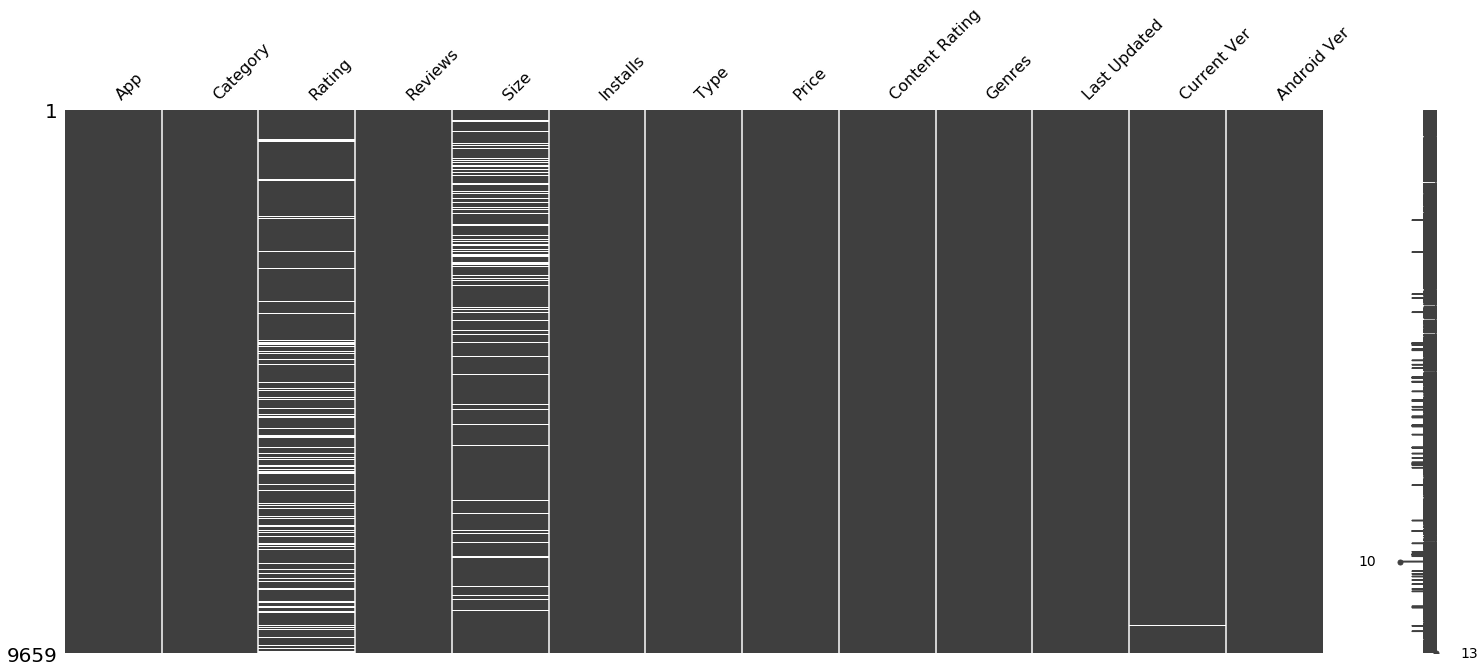

In [10]:
#USING MISSING NO LIBRARY!  --> WHITE LINES SHOWS MISSING ROWS IN THE DATA!
msno.matrix(df)

In [11]:
#DROPPING NANS, NULL ENTRIES IN THE DATA!
df= df.dropna()

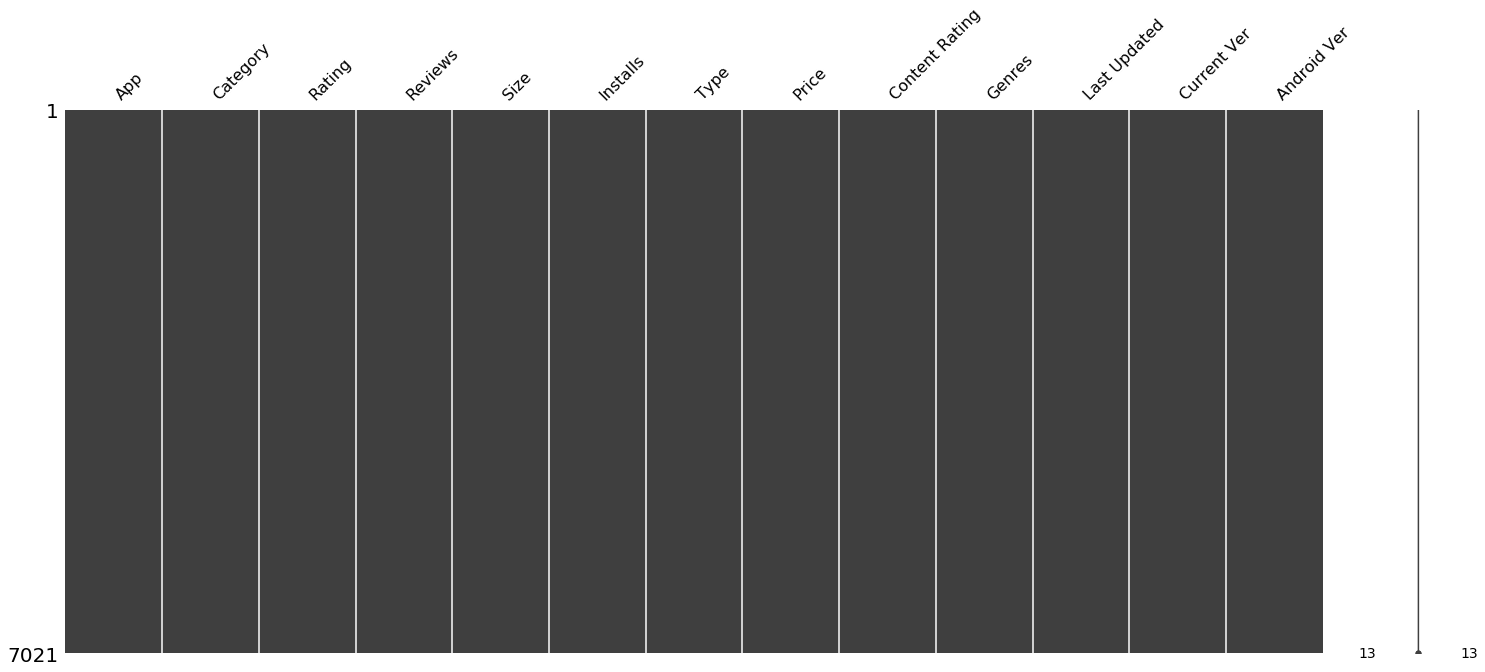

In [12]:
#NO WHITE LINES --> DATA HAS NO MISSING DATA!
msno.matrix(df)

# Cleaning Columns : Size , Installs , Price!

In [13]:
#  --> Cleaning Size column!         
#  --> REMOVING 'M' FROM THE END ('M' REPRESENTS MEGABYTES!)
df.Size= df.Size.apply(lambda x: float(x[:-1]))

In [14]:
#CUSTOMIZED FUNCTION MADE TO CLEAN INSTALLS AND PRICE
# PRICE CONTAINS '$' IN THE STARTING
# INSTALLS HAS ',' AND '+' IN THE VALUES!
def Cleaner(x):
    num=''
    for i in x:
        if i in '1234567890.':
            num=num+i
        else:
            pass
    return(float(num))

In [15]:
# INSTALLS AND PRICE CLEANED!
df['Installs']= df['Installs'].apply(Cleaner)
df['Price']= df['Price'].apply(Cleaner)

In [16]:
# NOTE GENRE COLUMN IS SAME AS CATEGORY!
df= df.drop('Genres',axis=1)

In [17]:
#USELESS FEATURES DROPPED!
df=df.drop(['Last Updated','Current Ver'],axis=1)   

In [20]:
# CHECK ANDROID VERSION IT HAS LONG STRING WHEREAS I AM INTERESTED IN KNOWING THE ANDROID VERSION
# FEATURE EXTRACTION!
def AndroidVersionCleaner(x):
    try:
        return(int(x[0]))             #TAKING FIRST VALUE FROM THE VERSION!
    except:
        return(-1) # REPLACING UNEXPECTED ERRORS BY -1

In [19]:
#APPLYING OUR CUSTOMIZED FUNCTION!
df['Android Ver']= df['Android Ver'].apply(AndroidVersionCleaner)

In [21]:
#UNIQUE ENTRIES!
df['Android Ver'].nunique()


11

In [22]:
#CHECKING THE VALUES IN THE ANDROID VERSION COLUMN!
df['Android Ver'].unique()


array([ 4,  2,  1,  3,  5,  6,  7, -1,  9,  8,  0])

In [30]:
df.loc[df['Android Ver']==-1,'Android Ver']=df['Android Ver'].median() #Replacing -1 with median values!

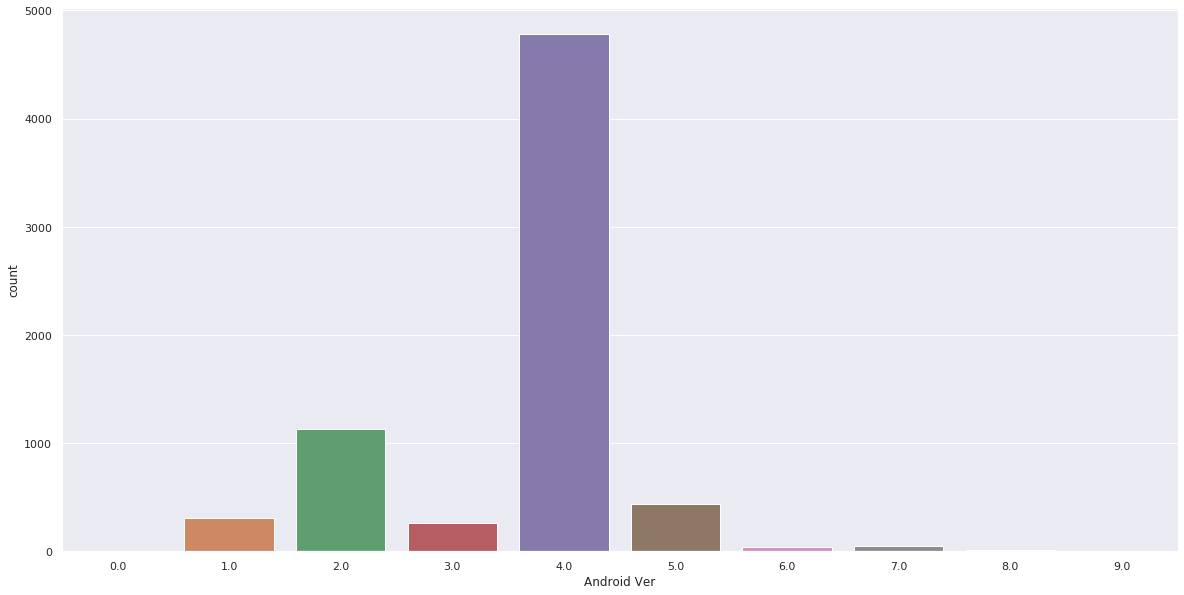

In [35]:
# CHECKING DISTRIBUTION USING COUNTPLOT!
# --> Most of the apps supports 4+ android version!
sns.countplot(df['Android Ver'])

In [37]:
#CHECKING CONTENT RATING UNIQUE VALUES!
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

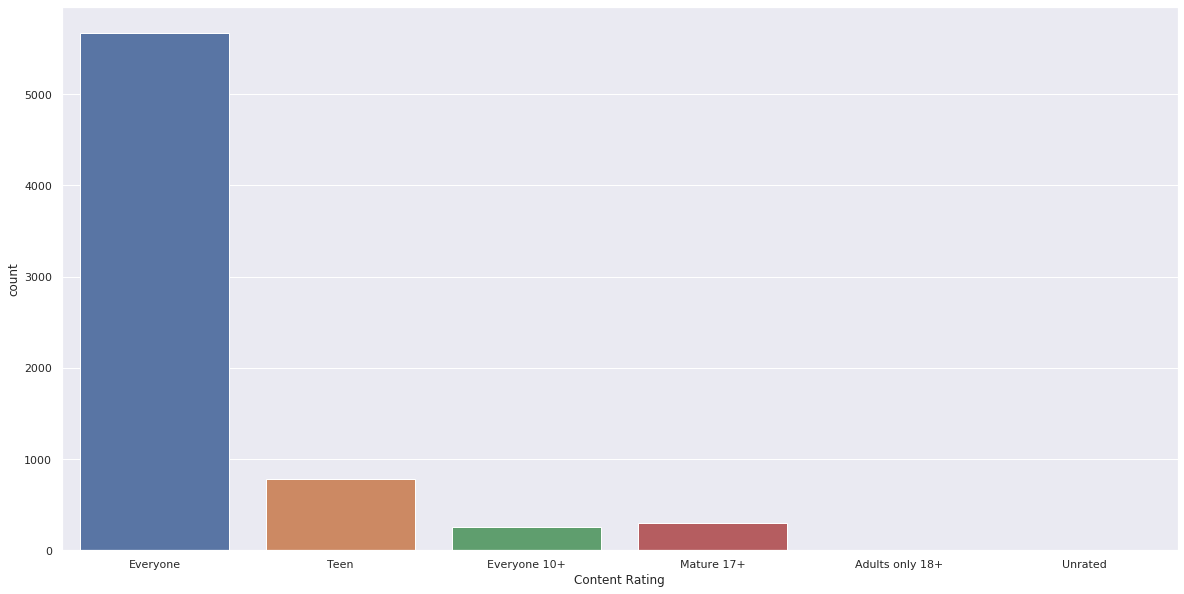

In [38]:
sns.countplot(df['Content Rating'])

In [39]:
df['Content Rating'].value_counts()

Everyone           5676
Teen                779
Mature 17+          304
Everyone 10+        259
Adults only 18+       2
Unrated               1
Name: Content Rating, dtype: int64

In [40]:
#CHECKING APPS WITH "ADULT ONLY 18+" RATINGS!
df[df['Content Rating']=='Adults only 18+']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
262,Manga Master - Best manga & comic reader,COMICS,4.6,24005,4.9,500000.0,Free,0.0,Adults only 18+,4.0
2378,DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017,41.0,1000000.0,Free,0.0,Adults only 18+,4.0


In [41]:
#CHECKING APPS WITH "UNRATED" RATINGS!
df[df['Content Rating']=='Unrated']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
7189,DC Universe Online Map,TOOLS,4.1,1186,6.4,50000.0,Free,0.0,Unrated,2.0


# DIVING DEEPER INTO APP CATEGORIES IN THE GOOGLE PLAY STORE! 

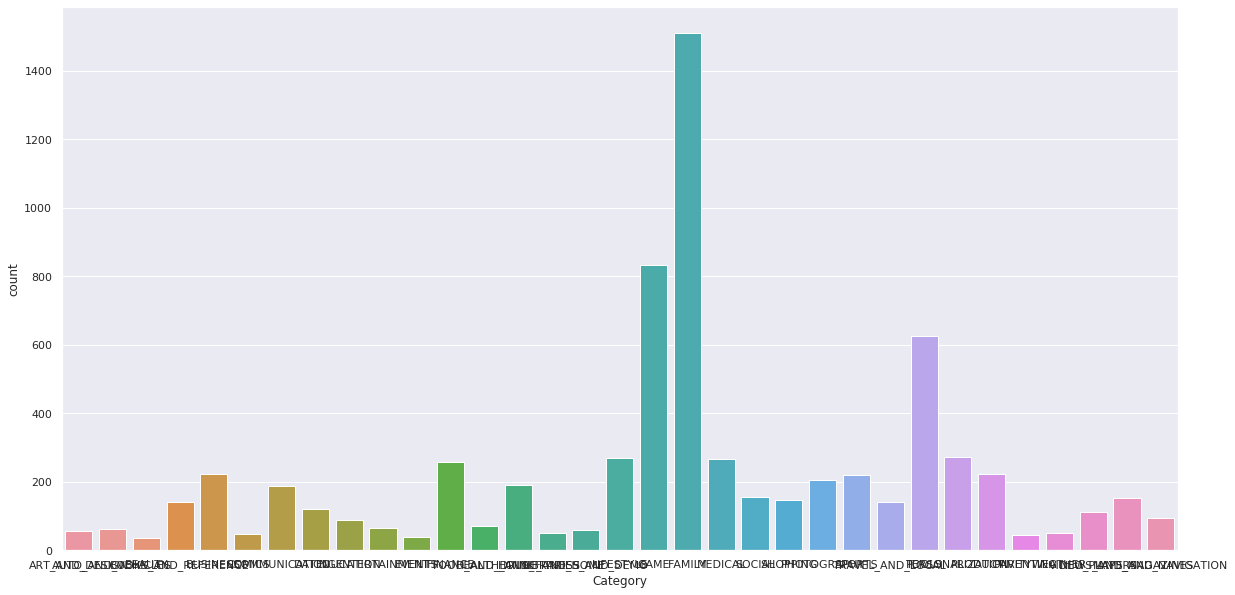

In [43]:
#COUNT PLOT FOR QUICK GLANCE AT THIS CATEGORY! --> MOST OF THE CATEGORY HAS LESS APPS IN THIS DATA!
sns.countplot(df['Category'])

In [44]:
df['Category'].value_counts()

FAMILY                 1511
GAME                    832
TOOLS                   625
PERSONALIZATION         274
LIFESTYLE               269
MEDICAL                 266
FINANCE                 258
PRODUCTIVITY            223
BUSINESS                222
SPORTS                  221
PHOTOGRAPHY             204
HEALTH_AND_FITNESS      191
COMMUNICATION           188
SOCIAL                  156
NEWS_AND_MAGAZINES      154
SHOPPING                146
TRAVEL_AND_LOCAL        141
BOOKS_AND_REFERENCE     141
DATING                  122
VIDEO_PLAYERS           112
MAPS_AND_NAVIGATION      94
EDUCATION                88
FOOD_AND_DRINK           72
ENTERTAINMENT            64
AUTO_AND_VEHICLES        63
LIBRARIES_AND_DEMO       60
ART_AND_DESIGN           58
HOUSE_AND_HOME           50
WEATHER                  50
COMICS                   47
PARENTING                44
EVENTS                   38
BEAUTY                   37
Name: Category, dtype: int64

In [46]:
# Grouping apps if apps are more than 200 in the data!
df1= df.groupby('Category').filter(lambda x: len(x) >= 200).reset_index()

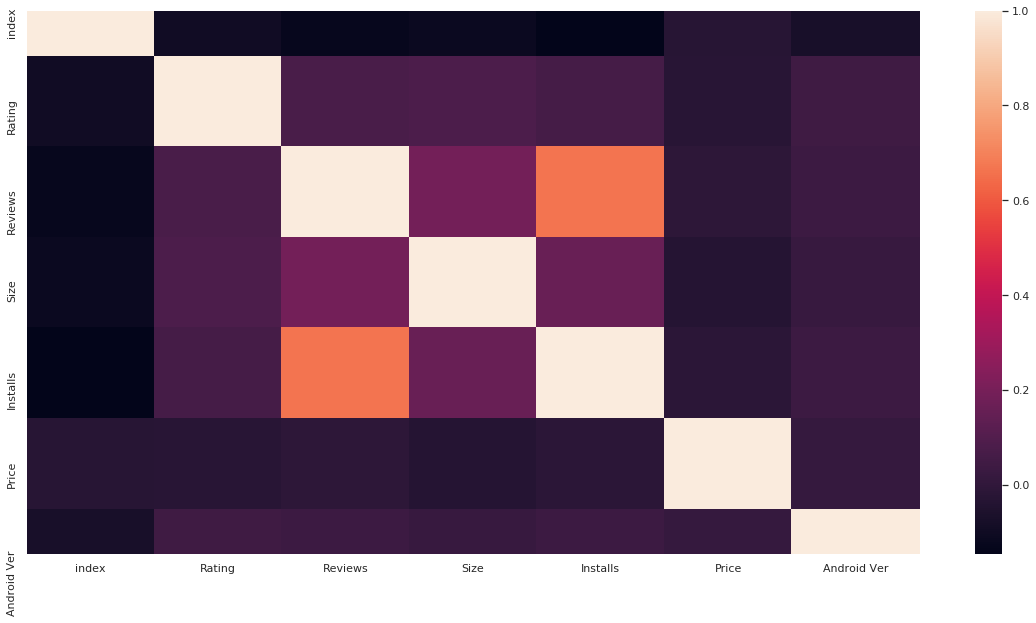

In [95]:
# Installs and Reviews are highly correlated!
sns.heatmap(df1.corr())


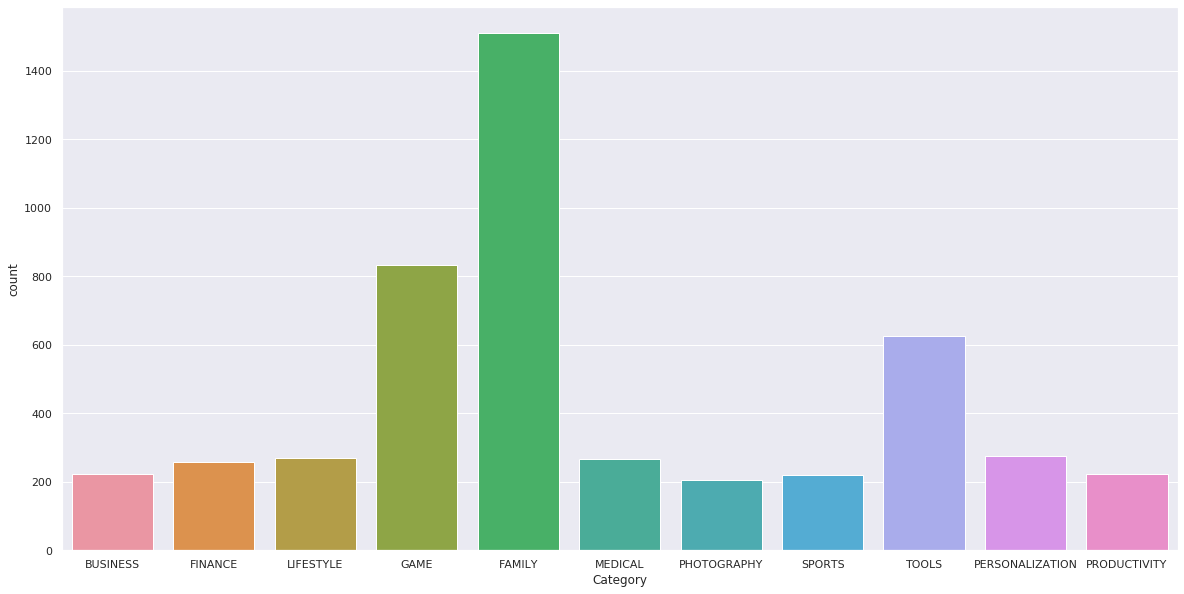

In [48]:
sns.countplot(df1.Category)
# --> There are more family related and game related apps !

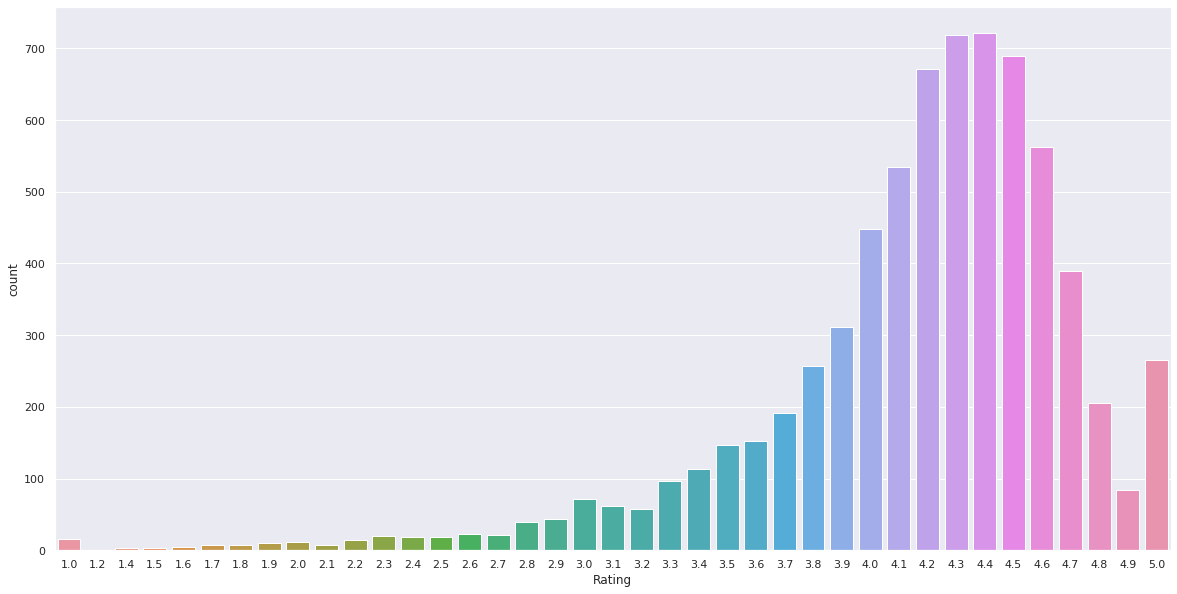

In [50]:
#DISTRIBUTION OF RATING 
# --> AVERAGE RATING IS AROUND 4.1 AND THE DISTRIBUTION IS SKEWED WHICH IMPLIES MOST OF THE PEOPLE HAVE TENDENCY
# TO GIVE 5 STARS IF THEY LIKE THE APP OR '1' STAR IF THEY DON'T LIKE THE APP. 

sns.countplot(df.Rating)

################ SOME SUMMARY DESCRIPTIVE STATISTICS OF THE RATING DISTRIBUTION ##############################

In [54]:
df.Rating.mean()

4.160703603475289

In [55]:
df.Rating.std()

0.5592409543681227

In [56]:
df.Rating.median()

4.3

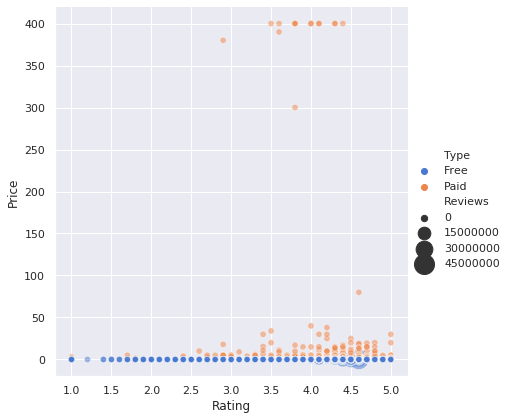

In [59]:
# PRICE VS RATINGS WHERE TYPE OF APPS IS EITHER PAID OR FREE
# CIRCLE IS LARGER IF REVIEWS ARE MORE
sns.relplot(y="Price", x="Rating", hue="Type", size="Reviews", sizes=(40, 400), alpha=.5, palette="muted", height=6, data=df1)

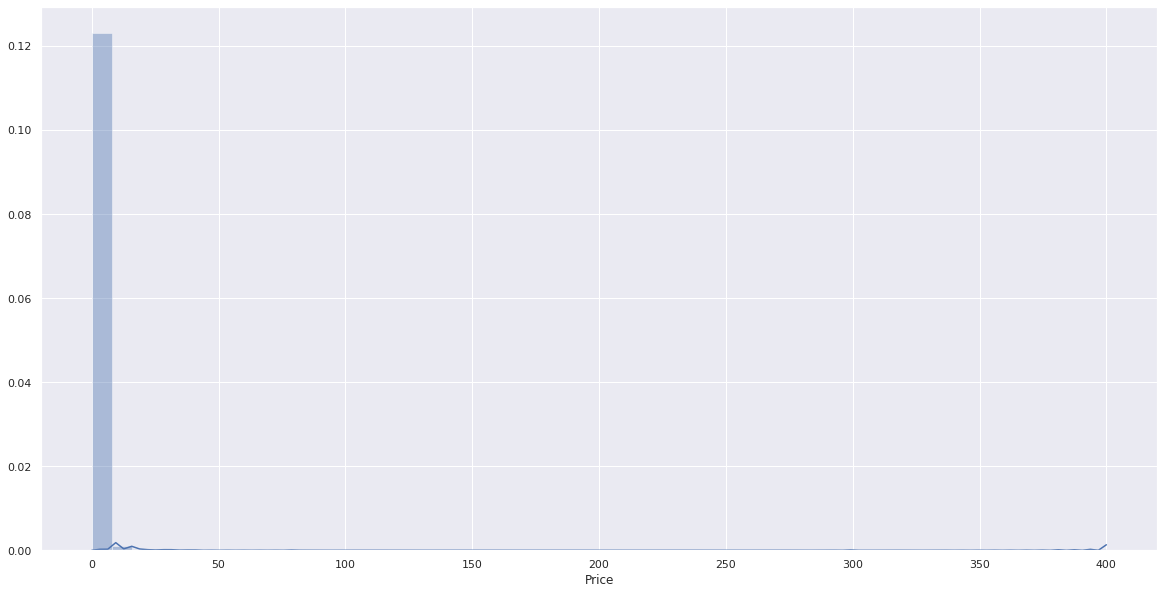

In [62]:
#This is the distribution of price but it doesn't tell anything if someone looks at it!
sns.distplot(df1.Price)


In [65]:
#ECDF Function! (empirical cumulative distribution function)

def ecdf(series,name):
    
    x=np.sort(series)
    y=np.arange(1,len(x)+1)/len(x)
    plt.figure(figsize=(20,10))

    ax=plt.plot(x,y,marker='*',linestyle='none')
    ax=plt.xlabel(name)
    ax=plt.ylabel('Percentage')



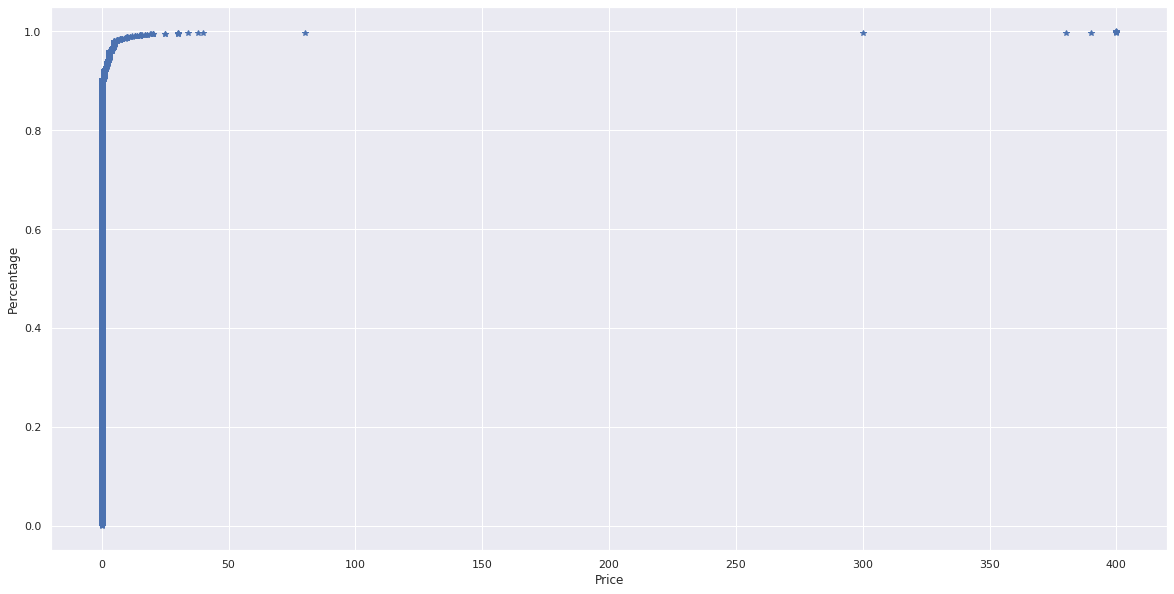

In [70]:
# Inference: Almost 99% of the data is below $50
ecdf(df1.Price,"Price")

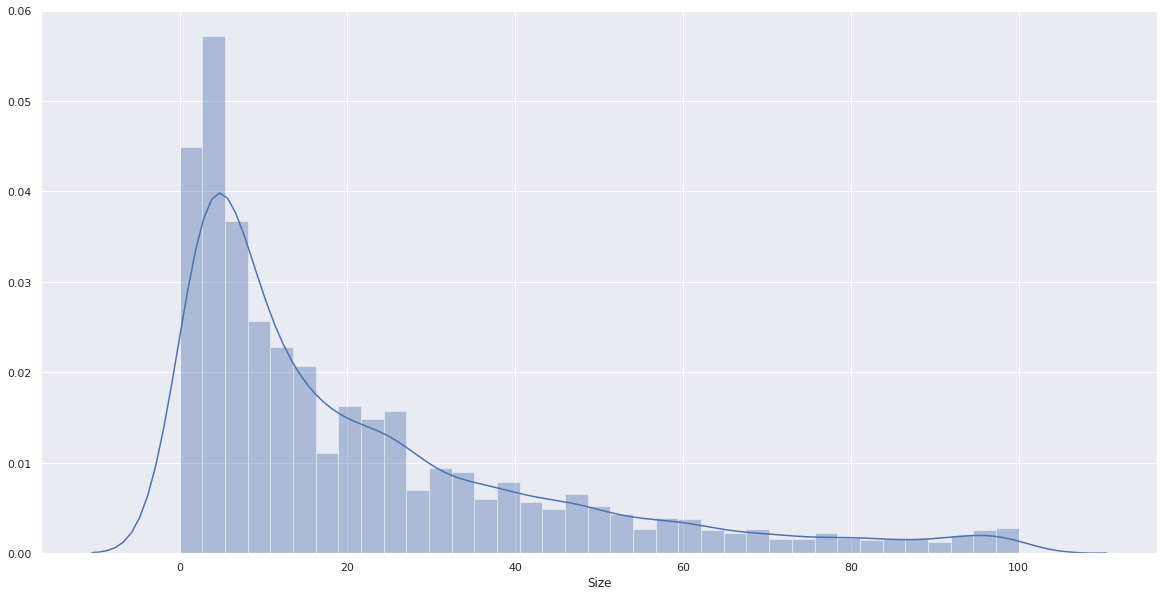

In [75]:
#Distribution of Size!
sns.distplot(df['Size'])

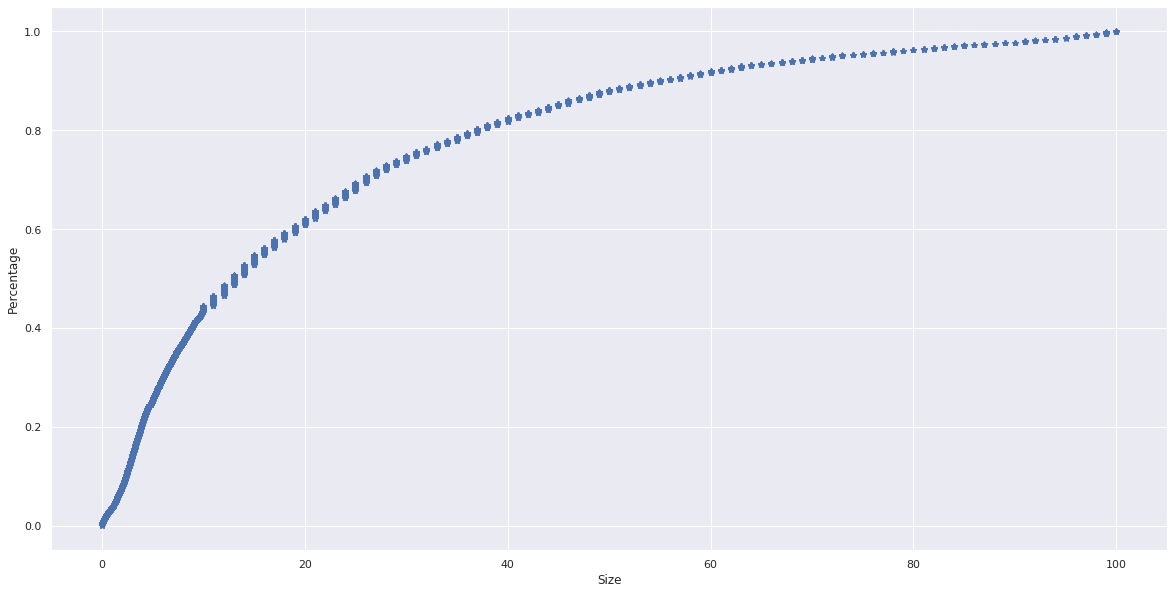

In [71]:
#Inference: Around 90% of the apps are below 60MB
ecdf(df.Size,'Size')

# Segragating Junk Apps!

In [77]:
#Apps whose price is more than $50. 1% of the apps have price more than $50
JunkApps = df1[df1.Price>50]

In [79]:
#LOOK AT JUNK APPS!
JunkApps

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
543,1755,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32.00,1000.0,Paid,79.99,Everyone,4.0
1246,3327,most expensive app (H),FAMILY,4.3,6,1.50,100.0,Paid,399.99,Everyone,7.0
1342,3465,💎 I'm rich,LIFESTYLE,3.8,718,26.00,10000.0,Paid,399.99,Everyone,4.0
1345,3469,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.30,10000.0,Paid,400.00,Everyone,4.0
1914,4396,I am rich,LIFESTYLE,3.8,3547,1.80,100000.0,Paid,399.99,Everyone,4.0
1916,4398,I am Rich Plus,FAMILY,4.0,856,8.70,10000.0,Paid,399.99,Everyone,4.0
1917,4399,I am rich VIP,LIFESTYLE,3.8,411,2.60,10000.0,Paid,299.99,Everyone,4.0
1918,4400,I Am Rich Premium,FINANCE,4.1,1867,4.70,50000.0,Paid,399.99,Everyone,4.0
1919,4401,I am extremely Rich,LIFESTYLE,2.9,41,2.90,1000.0,Paid,379.99,Everyone,4.0
1920,4402,I am Rich!,FINANCE,3.8,93,22.00,1000.0,Paid,399.99,Everyone,4.0


In [80]:
len(JunkApps)

16

# AppsRel : Relevant Apps!

In [81]:
AppsRel = df1[df1.Price<50]

In [83]:
AppsRel.count()

index             4889
App               4889
Category          4889
Rating            4889
Reviews           4889
Size              4889
Installs          4889
Type              4889
Price             4889
Content Rating    4889
Android Ver       4889
dtype: int64

In [84]:
# Grouping by Category!
apps_by_categ = AppsRel.groupby('Category').mean().reset_index()

In [85]:
apps_by_categ= apps_by_categ.drop(['index','Android Ver'],axis=1)

In [86]:
apps_by_categ

,Category,Rating,Reviews,Size,Installs,Price
0,BUSINESS,4.096396,19777.873874,13.934414,1.740013e+06,0.231622
1,FAMILY,4.179894,75173.839416,29.049542,2.357423e+06,0.417034
2,FINANCE,4.107937,35184.686508,18.091746,9.703345e+05,0.158452
3,GAME,4.235697,629111.813702,42.879375,1.386100e+07,0.326190
4,LIFESTYLE,4.099621,29029.125000,15.648409,1.531773e+06,0.278182
5,MEDICAL,4.160755,3908.849057,18.859472,1.190535e+05,1.905547
6,PERSONALIZATION,4.324453,102438.248175,11.577482,3.266905e+06,0.420876
7,PHOTOGRAPHY,4.114216,188368.549020,15.783873,7.323006e+06,0.325343
8,PRODUCTIVITY,4.132735,104201.569507,12.060673,5.813014e+06,0.237489
9,SPORTS,4.200905,113725.389140,26.400000,3.648468e+06,0.363032


In [87]:
#Plotting Ratings and Size of the Relevant Apps!
fig = go.Figure()
fig.add_trace(go.Bar(
    
    x=apps_by_categ.Category,
    y=apps_by_categ.Rating,
    name='Ratings',
    marker_color='indianred'
    
))
fig.add_trace(go.Bar(
    
    x=apps_by_categ.Category,
    y=apps_by_categ.Size,
    name='Size',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

# Paid Apps EDA (Exploratory Data Analysis!)

In [89]:
PaidApps= AppsRel[AppsRel.Type=='Paid']   #appsRel --> Apps Relvant!

In [90]:
PaidApps= PaidApps.groupby('Category').mean().reset_index()

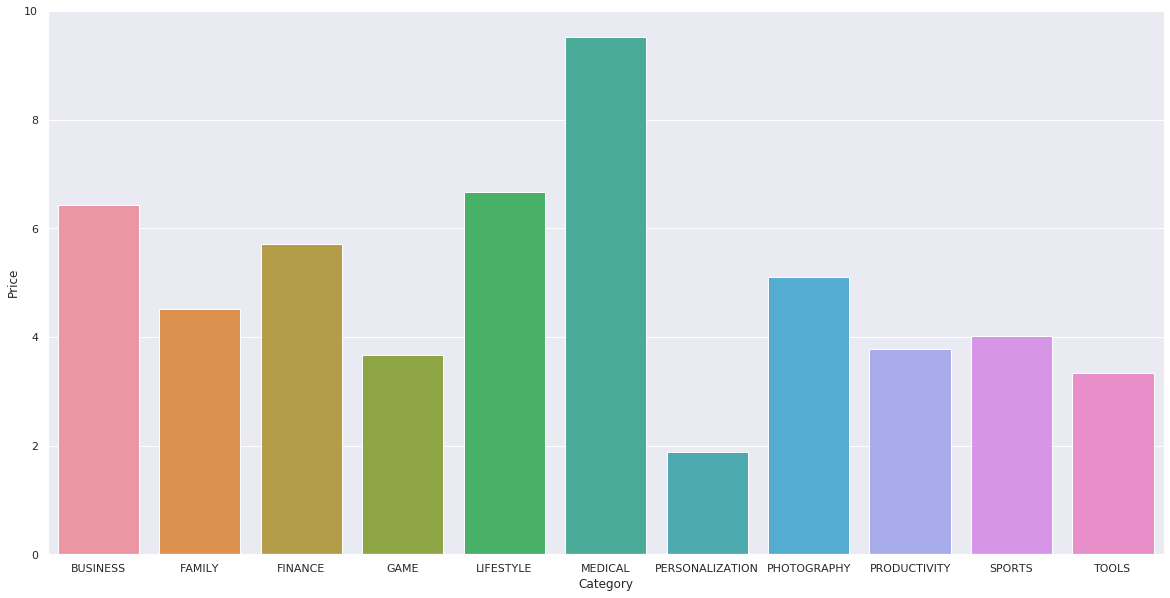

In [91]:
sns.barplot(data=PaidApps,x='Category',y='Price')

######################     Number of Installation vs Type of Apps! ######################################

In [92]:
fig = go.Figure()
trace0 = go.Box(
    # Data for paid apps
    y=AppsRel['Installs'][AppsRel['Type'] == 'Paid'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=AppsRel['Installs'][AppsRel['Type'] == 'Free'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

# Add trace0 and trace1 to a list for plotting
data = [trace0,trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

In [108]:
#Paid apps have on an average a better ratings. This could potentially be because of the fact that the developers 
# extend extra support and features. Also, there is no 'Ads' running!
fig = px.box(df1, x="Type", y="Rating")
fig.show()

# Loading Reviews.csv

In [96]:
rev= pd.read_csv('user_reviews.csv')

In [97]:
rev.shape

(64295, 5)

In [98]:
rev= rev.dropna()

In [99]:
rev.shape

(37427, 5)

In [100]:
rev.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


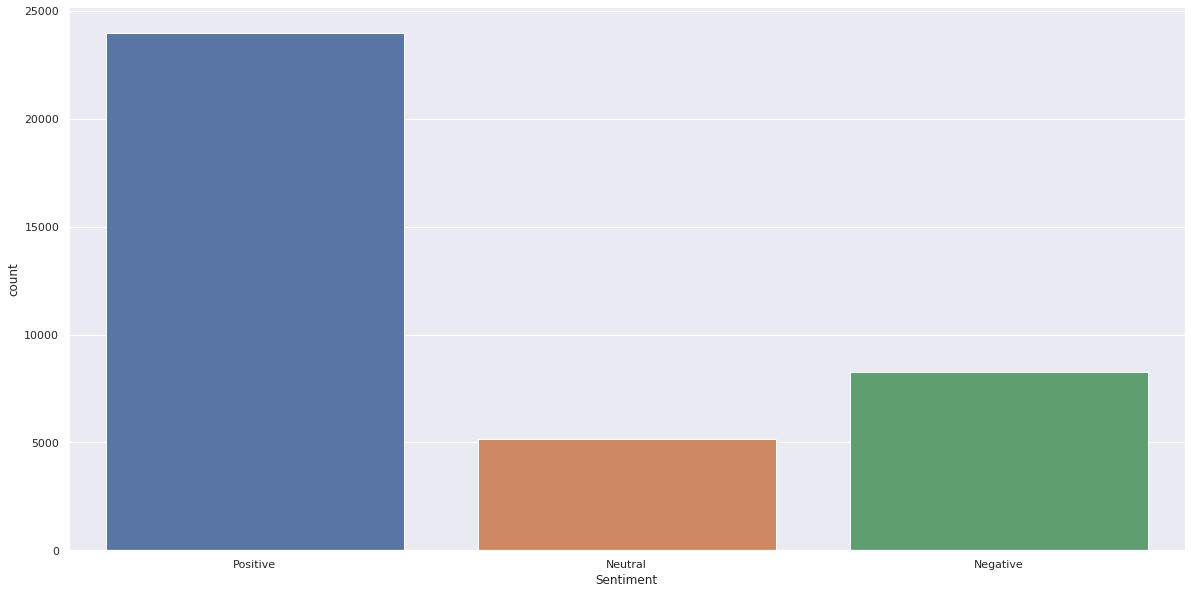

In [101]:
sns.countplot(rev.Sentiment)

In [102]:
rev[rev['Sentiment']=='Neutral']

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
8,10 Best Foods for You,"Looking forward app,",Neutral,0.0,0.0
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.0,0.0
22,10 Best Foods for You,God health,Neutral,0.0,0.0
25,10 Best Foods for You,I found lot wealth form health...,Neutral,0.0,0.0
29,10 Best Foods for You,On test....,Neutral,0.0,0.0
...,...,...,...,...,...
64189,Hotwire Hotel & Car Rental App,Solid app. No issues yet. Been using year.,Neutral,0.0,0.1
64194,Hotwire Hotel & Car Rental App,"Keeps telling there's problem date time, can't...",Neutral,0.0,0.0
64200,Housing-Real Estate & Property,Why business? Your filters don't work.. redire...,Neutral,0.0,0.0
64205,Housing-Real Estate & Property,I want list property sale option. Please connect,Neutral,0.0,0.0


In [103]:
rev= rev.groupby('App').mean()

In [104]:
rev

,Sentiment_Polarity,Sentiment_Subjectivity
App,,
10 Best Foods for You,0.470733,0.495455
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.392405,0.545516
11st,0.185943,0.455340
1800 Contacts - Lens Store,0.318145,0.591098
1LINE – One Line with One Touch,0.196290,0.557315
...,...,...
Hotels.com: Book Hotel Rooms & Find Vacation Deals,0.101622,0.545444
Hotspot Shield Free VPN Proxy & Wi-Fi Security,0.251765,0.393284
Hotstar,0.038178,0.493964


In [105]:
#Merging two Dataframes on 'App'
merged_df=pd.merge(df1,rev, on = 'App', how = "inner")


In [106]:
merged_df

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver,Sentiment_Polarity,Sentiment_Subjectivity
0,197,Curriculum vitae App CV Builder Free Resume Maker,BUSINESS,4.5,4458,3.9,500000.0,Free,0.0,Everyone,4.0,0.393703,0.498036
1,198,Google Primer,BUSINESS,4.4,62272,18.0,10000000.0,Free,0.0,Everyone,4.0,0.750000,0.675000
2,206,Call Blocker,BUSINESS,4.6,188841,3.2,5000000.0,Free,0.0,Everyone,4.0,0.027973,0.655431
3,231,Fast Scanner : Free PDF Scan,BUSINESS,4.5,103755,14.0,10000000.0,Free,0.0,Everyone,4.0,0.313063,0.427900
4,236,Google Ads,BUSINESS,4.3,29313,20.0,5000000.0,Free,0.0,Everyone,4.0,0.139965,0.432399
...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,3159,Hay Day,FAMILY,4.5,10053186,94.0,100000000.0,Free,0.0,Everyone,4.0,0.019572,0.503682
317,3210,Fruit Ninja®,GAME,4.3,5091448,41.0,100000000.0,Free,0.0,Everyone,4.0,0.154795,0.493289
318,3226,Bad Piggies,FAMILY,4.3,1168959,66.0,50000000.0,Free,0.0,Everyone,4.0,0.007941,0.538949
319,4434,Diary with lock password,LIFESTYLE,4.3,179139,9.7,5000000.0,Free,0.0,Everyone,4.0,0.292267,0.509656


In [112]:
# People feel more positive about paid apps on average!. Reason: it might have received more positive reviews!
fig = px.box(merged_df, x="Type", y="Sentiment_Polarity")
fig.show()


# Thank You!